In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data', index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [8]:
#to compute and store the scalling parameters, but doesn't transform the data
scaler.fit(df.drop('TARGET CLASS', axis =1))

StandardScaler()

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis =1))

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [11]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [14]:
#Compute scalling parameters and transform the data in one step
trans = scaler.fit_transform(df.drop('TARGET CLASS', axis =1))

In [15]:
data_trans = pd.DataFrame(trans, columns=df.columns[:-1])
data_trans.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=data_trans
y= df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(confusion_matrix(y_test, pred))

[[151   8]
 [ 15 126]]


In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [38]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [39]:
print(error_rate)

[0.07666666666666666, 0.09, 0.05, 0.07, 0.056666666666666664, 0.05, 0.06666666666666667, 0.06, 0.05, 0.056666666666666664, 0.05333333333333334, 0.04666666666666667, 0.05, 0.056666666666666664, 0.056666666666666664, 0.05, 0.05, 0.04666666666666667, 0.05, 0.05333333333333334, 0.05, 0.05, 0.06333333333333334, 0.056666666666666664, 0.056666666666666664, 0.05, 0.05, 0.04666666666666667, 0.06, 0.05, 0.056666666666666664, 0.04666666666666667, 0.05333333333333334, 0.043333333333333335, 0.04666666666666667, 0.043333333333333335, 0.04666666666666667, 0.043333333333333335, 0.05]


In [40]:
error_rate = pd.DataFrame(error_rate, columns=['error_rate'])
error_rate

,error_rate
0,0.076667
1,0.090000
2,0.050000
3,0.070000
4,0.056667
5,0.050000
6,0.066667
7,0.060000
8,0.050000
9,0.056667


Text(0, 0.5, 'Error Rate')

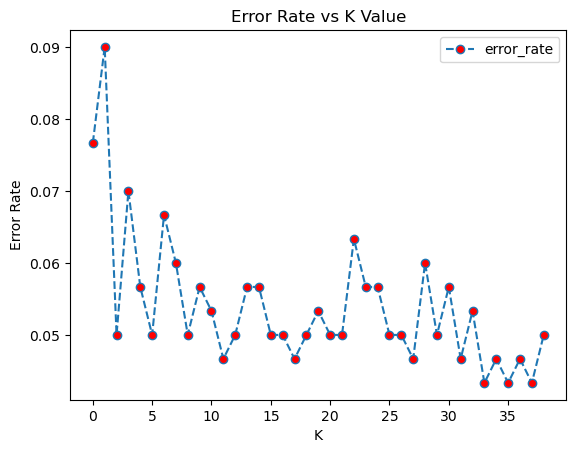

In [46]:
error_rate.plot(linestyle = '--', marker='o', markerfacecolor='red')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [48]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

